<a href="https://colab.research.google.com/github/AnvitD/Trading-strategy/blob/main/Strategy_Buildout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we have a momentum strategy. This strategy takes advantage of herding bias: the idea that when an asset is on the rise, people will want to get in on it and buy more.

The way this strategy works is it takes the Z-score of the returns from the past 10 days with respect to the returns over the  past year. If the cryptocurrency is performing well, then we buy, otherwise we don't

In [ ]:
# compute returns
import yfinance as yf
import numpy as np

data = yf.download(['ADA-USD','BNB-USD','BTC-USD','ETH-USD'],'2016-1-1')

# calculate pct change (this is the % return for the day)
ret = data['Adj Close'].pct_change()

[*********************100%***********************]  4 of 4 completed


In [ ]:
# compute portfolios and strategy returns
port = (ret.rolling(10,min_periods=1).mean() - ret.rolling(365,min_periods=10).mean())
port = port / ret.rolling(365,min_periods=10).std()

# use tanh to cap positions at -1 and 1
positions = np.tanh(port)

# apply strategy to returns by multiplying positions by previous day returns
strat_ret = positions.shift()*ret

In [ ]:
# strategy sharpes
strat_ret.mean()*np.sqrt(365)/strat_ret.std()

,0
Ticker,
ADA-USD,0.782916
BNB-USD,0.861299
BTC-USD,0.676442
ETH-USD,0.770010


In [ ]:
# strategy sharpes
strat_ret.mean()*np.sqrt(365)/strat_ret.std()

,0
Ticker,
ADA-USD,0.639377
BNB-USD,0.683792
BTC-USD,0.377443
ETH-USD,0.396578


<Axes: xlabel='Date'>

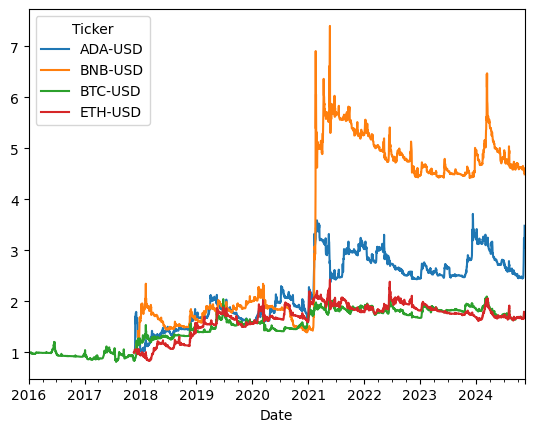

In [ ]:
# plot strategy cum returns
(strat_ret+1).cumprod().plot()

In [ ]:
# correlations with underlying assets. Fairly low correlation
strat_ret.corrwith(ret)

,0
Ticker,
ADA-USD,0.157613
BNB-USD,0.214666
BTC-USD,-0.097947
ETH-USD,-0.160785
